In [ ]:
#Lince Rumainum
#ISE5123
#HW 4

In [50]:
#Problem 1

#libraries
import numpy as np
import pandas as pd

def mean (inputList):
    # calculate mean
    if (len(inputList) > 0):
        #length of list
        listLen = len(inputList)
        #initialize sum
        sum = 0

        # calculate sum of the list
        for i in range(0,listLen):            
            sum += float(inputList[i])
        return round(sum/listLen, 2)
    # no input
    else:
        return 0

def standardDeviation (inputList):
    # calculate standardDeviation
    if (len(inputList) > 0):
        # length of list
        listLen = len(inputList)
        
        #get the mean
        aveList = mean(inputList)
        #initialize summation
        sum = 0
        #calculate summation part of standard deviation
        for i in range(listLen):
            sum += (float(inputList[i]) - aveList) ** 2
        #calculate the standard deviation    
        stdDev = round((sum / listLen) ** 0.5, 3)
        
        return stdDev

        
    # no input
    else:
        return 0
    
#open input file
#inputFile = open("salary.txt",'r')

nameAll = []
salaryAll = []
yearsAll = []
sexAll = []
with open("salary.txt") as f:
    next(f)
    for line in f:
        # initialize data list
        dataAll = []
        # strip each line on the file
        line = line.strip()    
        #print("line: ", line)
        # check if whitespace or enter
        if (line != ""):      
            # split data word by word
            for words in line.split():
                # put each word into data list
                dataAll.append(words)
            #print(dataAll)

            #put data accordingly
            nameAll.append(str(dataAll[0])) #name
            salaryAll.append(str(dataAll[1])) #salary
            yearsAll.append(str(dataAll[2])) #years
            sexAll.append(str(dataAll[3])) #sex

#close input file
#inputFile.close()

for i in range(0, len(salaryAll)): 
    salaryAll[i] = float(salaryAll[i]) 
    yearsAll[i] = float(yearsAll[i]) 

#create data frame for all
dfAll = pd.DataFrame ({'Employee': nameAll, 'Salary': salaryAll, 'Years': yearsAll, 'Sex': sexAll})

#initialize female employees data list
nameF = []
salaryF = []
yearsF = []
#initialize male employees data list
nameM = []
salaryM = []
yearsM = []
                   
for i in range(1, len(nameAll)):
    if sexAll[i] == 'F':
        nameF.append(nameAll[i])
        salaryF.append(salaryAll[i])
        yearsF.append(yearsAll[i])
    else:         
        nameM.append(nameAll[i])
        salaryM.append(salaryAll[i])
        yearsM.append(yearsAll[i])          

#create data frame for female employees
dfF = pd.DataFrame({'Employee': nameF, 'Salary': salaryF, 'Years': yearsF})
#create data frame for male employees
dfM = pd.DataFrame({'Employee': nameM, 'Salary': salaryM, 'Years': yearsM})

#Find max salary for each gender
maxSalaryF = salaryF[0]
for i in range(1,len(salaryF)):
    if salaryF[i] > maxSalaryF:
        maxSalaryF = salaryF[i]

maxSalaryM = salaryM[0]
for i in range(1,len(salaryF)):
    if salaryM[i] > maxSalaryM:
        maxSalaryM = salaryM[i]
        
#Find mean salary for each gender
meanSalaryF = mean(salaryF)
meanSalaryM = mean(salaryM)

#Find standard deviation salary for each gender
stdF = standardDeviation(salaryF)
stdM = standardDeviation(salaryM)

#print results
print("Maximum salary for female employee: ", maxSalaryF)
print("Maximum salary for male employee: ", maxSalaryM)

print("Mean salary for female employee: ", meanSalaryF)
print("Mean salary for male employee: ", meanSalaryM)

print("Standard devation of the salary for female employee: ", stdF)
print("Standard devation of the salary for male employee: ", stdM)

#The male employees averages higher than the female employees 
#with their highest salary also receive higher income than the highest paid female employee.
#According the standard deviation, the salaries of the female employees are closer to the mean than the male employees.

Maximum salary for female employee:  29.0
Maximum salary for male employee:  45.0
Mean salary for female employee:  23.3
Mean salary for male employee:  32.5
Standard devation of the salary for female employee:  4.1
Standard devation of the salary for male employee:  7.394


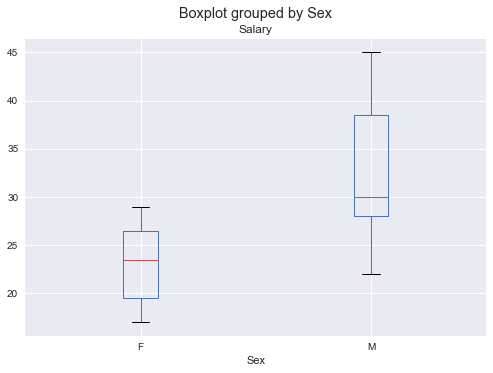

In [51]:
#Problem 2
import matplotlib.pyplot as plt

dfAll.boxplot(column=['Salary'], by='Sex')
plt.show()

#It shows that the salary of males employess has wider range
#and higher than the female employees

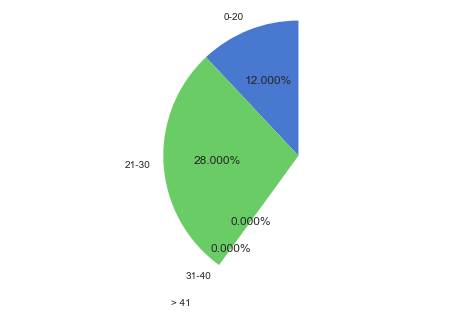

In [76]:
#Problem 3 
import matplotlib.pyplot as plt

#create counters
count20 = 0
count30 = 0
count40 = 0
count50 = 0


for i in range(0, len(salaryF)): 
    if salaryF[i] <= 20:
        count20 += 1
    elif salaryF[i] <= 30:
        count30 += 1
    elif salaryF[i] <= 40:
        count40 += 1
    else:
        count50 += 1

#pie chart for female employees
txtLabels = '0-20', '21-30','31-40','> 41'
fractions = [count20/25, count30/25, count40/25,count50/25]
offsets =(0, 0, 0, 0.25)
plt.pie (fractions, explode=offsets, labels = txtLabels,
         autopct ='%1.3f%%', startangle = 90,colors= sns.color_palette ('muted'))
plt.axis('equal')
plt.show()

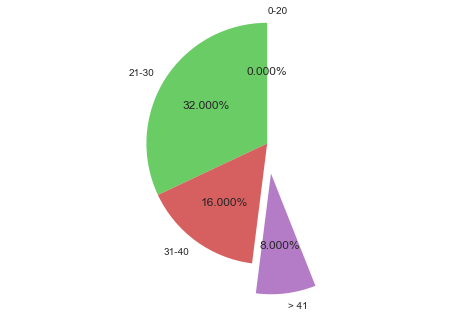

In [77]:
#Pie chart for male employees
#create counters
count20 = 0
count30 = 0
count40 = 0
count50 = 0


for i in range(0, len(salaryM)): 
    if salaryM[i] <= 20:
        count20 += 1
    elif salaryM[i] <= 30:
        count30 += 1
    elif salaryM[i] <= 40:
        count40 += 1
    else:
        count50 += 1

#plot pie chart
txtLabels = '0-20', '21-30','31-40','> 41'
fractions = [count20/25, count30/25, count40/25,count50/25]
offsets =(0, 0, 0, 0.25)
plt.pie (fractions, explode=offsets, labels = txtLabels,
         autopct ='%1.3f%%', startangle = 90,colors= sns.color_palette ('muted'))
plt.axis('equal')
plt.show()

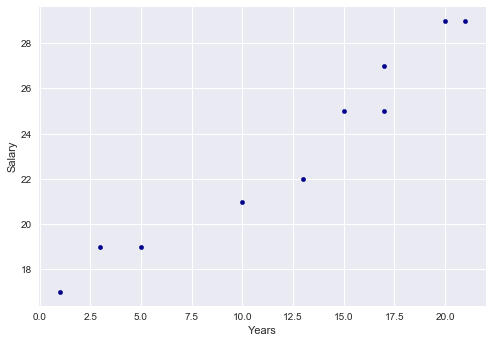

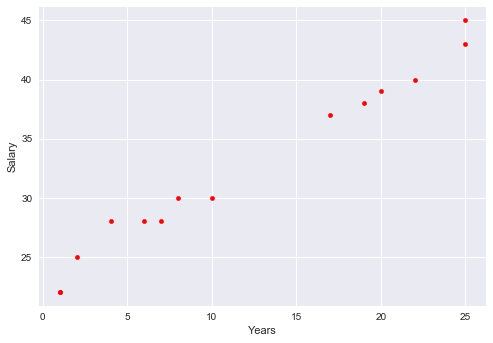

In [55]:
#Problem 4
import matplotlib.pyplot as plt
import pandas as pd

#create scatter plots
dfF.plot.scatter(x='Years',y='Salary', c='DarkBlue')
dfM.plot.scatter(x='Years',y='Salary', c='Red')
plt.show()

#Both female and male employees receiver higher salary when year increases

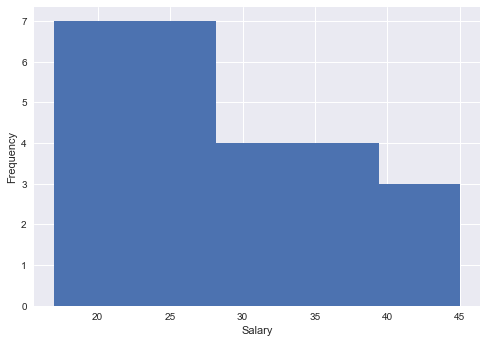

In [57]:
#Problem 5

#Plot histogram of salaries (5 bins)
plt.hist (dfAll['Salary'], bins=5)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

#it does not follow a normal distribution

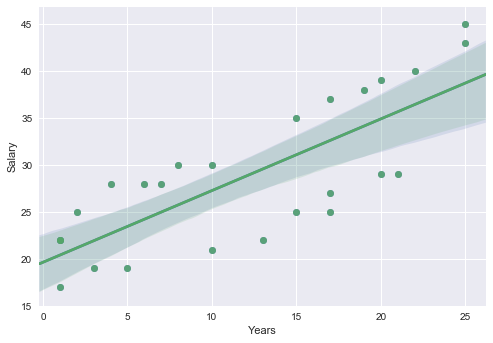

In [59]:
#Problem 6
import matplotlib.pyplot as plt
import seaborn as sns

#regression plot
sns.regplot('Years','Salary',data = dfAll)
plt.show()

#it shows that the more years of experience employee has,
#the salary is higher. Although, there are gaps between employee
#with the same years of experience

In [ ]:
#Problem 7
#I would rule in favor of the plaintiffs(females)
#because from the pie charts, it shows that the female employees have 
#less percentage of the same income than their male co-workers.
#from the scatter plots, it shows that female employees
#with the same years of experience is getting paid much less than
#their male co-workers.